In [1]:
# In Class Lab 6
# Surface Brightness Profiles


In [2]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `SersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input: the radius, $R_e$, $n$ and the total stellar mass of the system.


In [34]:
 """A function that returns the Sersic Profile in terms of the effective radus (the half-light radius) 
 for an elliptical system """
def SersicE(R, Re, n, Mtot):
    """ Inputs:
 Re : effective radius or half-light radius (kpc)
 n : the Sersic index
 R : array of radii (kpc)
 Mtot : the total stellar mass (Msun)
 Returns:
 Surface brightness profile in (Lsun/kpc**2)
 
 Assuming the M/L ~ 1"""
    L = Mtot # Total luminosity is equal to the total stellar mass
    
    # Ie = L / (7.2 * pi * Re**2)
    Ie = L / (7.2 * np.pi * Re**2)
    
    # The exponent
    A = (R/Re)**(1/n) - 1
    
    return Ie*np.exp(-7.67*A)

# Part B

a) Create an instance of the MassProfile Class for the MW. Store it as a variable `MW`. 


In [11]:
M31 = MassProfile('M31',0)

b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [12]:
R = np.arange(0.1, 30, 0.1)

c) Define a new array called `BulgeMass`, that uses the function `MassEnclosed` within MassProfile to compute themass profile of the bulge.  Get rid of astropy units in `BulgeMass` by adding `.value` 


In [16]:
BulgeMass = M31.MassEnclosed(3,R) # particle type 3 = bulge

In [21]:
BulgeMass[10]

<Quantity 4.43864301e+09 solMass>

d) Compute the surface mass density profile for the simulated bulge and store it as an array called `BulgeI`. Assuming M/L ~ 1 this is also the surface brightness profile in Lsun/kpc^2

In [22]:
# I = L/(4 * pi * D**2)

BulgeI = BulgeMass/4/np.pi/R**2

# Part C

Compute $R_e$, the half mass radius, for the bulge

In [25]:
BulgeTotal = np.max(BulgeMass)

In [26]:
Low = BulgeTotal/2
High = BulgeTotal/2 + BulgeTotal/2*0.01

In [27]:
index = np.where( (BulgeMass > Low) & (BulgeMass < High))

In [29]:
Re = R[index]

In [30]:
BulgeTotal/2

<Quantity 8.91939648e+09 solMass>

In [31]:
BulgeMass[index]

<Quantity [8.92942278e+09] solMass>

# Part D

a) Plot the surface density profile of the simulated bulge

b) Plot the Sersic profile, assuming a de Vaucouleurs Profile.

c) If the profiles don't match, try changing either $R_e$ or $n$

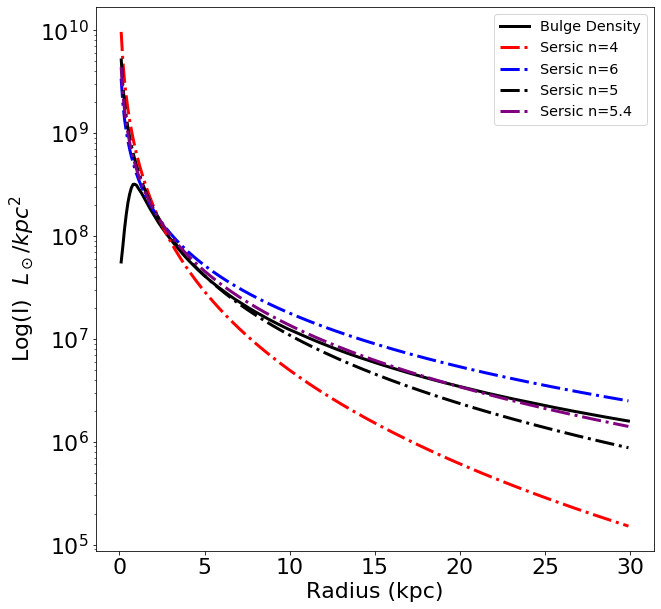

In [57]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R,BulgeI, color='black',linewidth=3, label='Bulge Density')


# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic 
plt.semilogy(R, SersicE(R,Re,4,BulgeTotal), color='red', ls='-.',lw=3,label='Sersic n=4')
plt.semilogy(R, SersicE(R,Re,6,BulgeTotal), color='blue', ls='-.',lw=3,label='Sersic n=6')
plt.semilogy(R, SersicE(R,Re,5,BulgeTotal), color='black', ls='-.',lw=3,label='Sersic n=5')
plt.semilogy(R, SersicE(R,Re,5.4,BulgeTotal), color='purple', ls='-.',lw=3,label='Sersic n=5.4')

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')
